Lets evaluate on test_set

In [1]:
#Assert working directories
import os
os.getcwd()

'C:\\Users\\midhu\\Documents\\CNN_2'

In [2]:
from alpha import random_mini_batch, load_data, plot_images, plot_confusion_matrix, misclassified_images, plot_images_misclassified
from cnn_utils import create_placeholders, conv_layer, compute_cost

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time
from tqdm import tqdm as tqdm #For professional progress-bar
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [49]:
TEST_DIR = ".\\test_again"
IMG_SIZE = 99
img_shape = (IMG_SIZE,IMG_SIZE,3)
num = 50

In [50]:
test, label= load_data(num, IMG_SIZE, DIR =TEST_DIR)

3it [00:00, 96.51it/s]


In [51]:
test.shape, label.shape

((3, 99, 99, 3), (3, 1))

In [52]:
label_df = pd.DataFrame(label, columns = ['classes'])
label_df.head()

,classes
0,AC Filter
1,AC Filter
2,AC Filter


In [53]:
unique_labels = label_df.classes.unique()
unique_labels

array(['AC Filter'], dtype=object)

In [54]:
en = LabelEncoder()
en.fit(label_df.classes)
encoded_label = en.transform(label_df.classes)
label_df["encoded_label"]  = encoded_label  #for confusion matrix in the end
label_df.head()

,classes,encoded_label
0,AC Filter,0
1,AC Filter,0
2,AC Filter,0


In [55]:
#get 10 images to plot
images = test[:10]
true_class = label[:10]
plot_images(images, true_class)

AssertionError: 

In [56]:
def predict(X_test, Y_test):
    
    tf.reset_default_graph() 
    
    iteration = tf.Variable(0, name="iteration", trainable=False)
    
    (m, n_H0, n_W0, n_C0) = X_test.shape             
    n_y = Y_test.shape[0]                            
    
    new_graph = tf.Graph()
    with tf.Session(graph =new_graph) as sess:
      
        saver = tf.train.import_meta_graph('.\\meta\\model.meta') #Import graph
        saver.restore(sess, tf.train.latest_checkpoint('.\\saved_model')) #Restore pretrained weghts

        Z                   =  tf.get_collection('Z')[0]
        X                   =  tf.get_collection('X')[0]
        correct_prediction  =  tf.get_collection('correct_prediction')[0]

        
        #one step forwardprop
        #prob = sess.run((tf.nn.softmax(Z)), feed_dict={X:X_val})
          
        predicted_op = sess.run(tf.argmax(Z, 1), feed_dict={X: X_test})
        actual_op    = Y_test
        correct_prediction = tf.equal(predicted_op, actual_op)
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))*100
        
        #test_accuracy = accuracy
        print("Test Accuracy: {0} %".format(sess.run(accuracy)))
        
    return predicted_op #prob

In [57]:
predicted= predict(test, encoded_label)

INFO:tensorflow:Restoring parameters from .\saved_model\model.chkpt-11998
Test Accuracy: 66.66667175292969 %


In [58]:
decoded_labels = en.inverse_transform(predicted)

ValueError: y contains new labels: [2]

In [59]:
plot_confusion_matrix(label, decoded_labels, unique_labels)

ValueError: Found input variables with inconsistent numbers of samples: [3, 59]

In [60]:
#get 10 images to plot
images = test[:10]
cls_true = label[:10]
cls_pred = decoded_labels[:10]
plot_images(images, cls_true, cls_pred)

AssertionError: 

In [61]:
miss = misclassified_images(encoded_label, predicted)
len(miss)

1

IndexError: index 1 is out of bounds for axis 0 with size 1

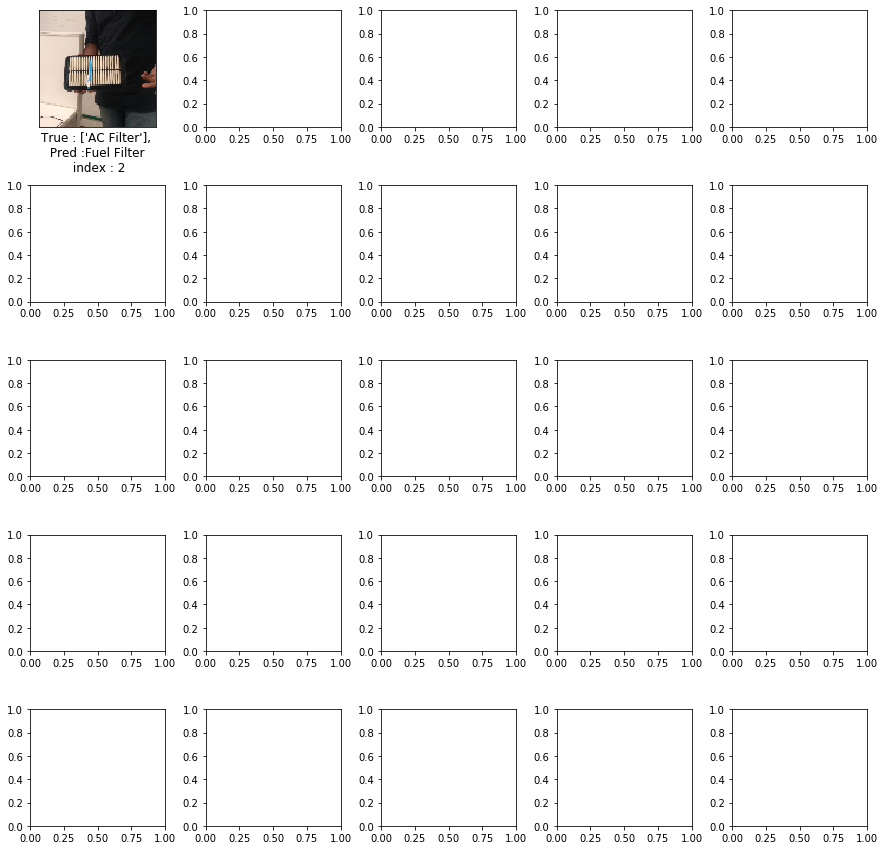

In [62]:
images = test[miss]
true_cls = label[miss]
pred_cls = decoded_labels[miss]
plot_images_misclassified(images, true_cls, pred_cls, miss)